# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/Users/zhan/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
grand_st = pd.read_csv('../datasets/grand_st.csv')

In [7]:
# Changing date columns into datetime form: 
grand_st['inspection_date'] = pd.to_datetime(grand_st['inspection_date'])
grand_st['approved_date'] = pd.to_datetime(grand_st['approved_date'])
grand_st.set_index('inspection_date',inplace = True)
grand_st.head()

,inspection_type,job_progress,latitude,longitude,result,approved_date
inspection_date,,,,,,
2019-11-18 14:40:34,INITIAL,1,40.718009,-73.993427,Passed Inspection,2019-11-19 13:38:14
2019-10-23 16:41:06,INITIAL,1,40.718009,-73.993427,Active Rat Signs,2019-10-24 12:12:51
2019-09-18 15:15:50,INITIAL,1,40.718009,-73.993427,Active Rat Signs,2019-09-19 11:03:46
2019-08-26 15:16:25,INITIAL,1,40.718009,-73.993427,Active Rat Signs,2019-08-27 13:01:51
2019-07-25 15:16:16,INITIAL,1,40.718009,-73.993427,Active Rat Signs,2019-07-29 08:39:23


In [8]:
grand_st.drop(columns=['latitude', 'longitude'], inplace = True)
grand_st.head()

,inspection_type,job_progress,result,approved_date
inspection_date,,,,
2019-11-18 14:40:34,INITIAL,1,Passed Inspection,2019-11-19 13:38:14
2019-10-23 16:41:06,INITIAL,1,Active Rat Signs,2019-10-24 12:12:51
2019-09-18 15:15:50,INITIAL,1,Active Rat Signs,2019-09-19 11:03:46
2019-08-26 15:16:25,INITIAL,1,Active Rat Signs,2019-08-27 13:01:51
2019-07-25 15:16:16,INITIAL,1,Active Rat Signs,2019-07-29 08:39:23


In [9]:
set(grand_st['inspection_type'])

{'BAIT', 'INITIAL'}

In [13]:
grand_st['inspection_type'] = grand_st['inspection_type'].map({'BAIT': 1, 'INITIAL': 2})

In [10]:
set(grand_st['result'])

{'Active Rat Signs', 'Bait applied', 'Monitoring visit', 'Passed Inspection'}

In [15]:
grand_st['result'] = grand_st['result'].map({'Active Rat Signs': 1, 
                                             'Bait applied': 2, 
                                             'Monitoring visit': 3, 
                                             'Passed Inspection': 4})

In [16]:
grand_st.head()

,inspection_type,job_progress,result,approved_date
inspection_date,,,,
2019-11-18 14:40:34,2,1,4,2019-11-19 13:38:14
2019-10-23 16:41:06,2,1,1,2019-10-24 12:12:51
2019-09-18 15:15:50,2,1,1,2019-09-19 11:03:46
2019-08-26 15:16:25,2,1,1,2019-08-27 13:01:51
2019-07-25 15:16:16,2,1,1,2019-07-29 08:39:23


In [18]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

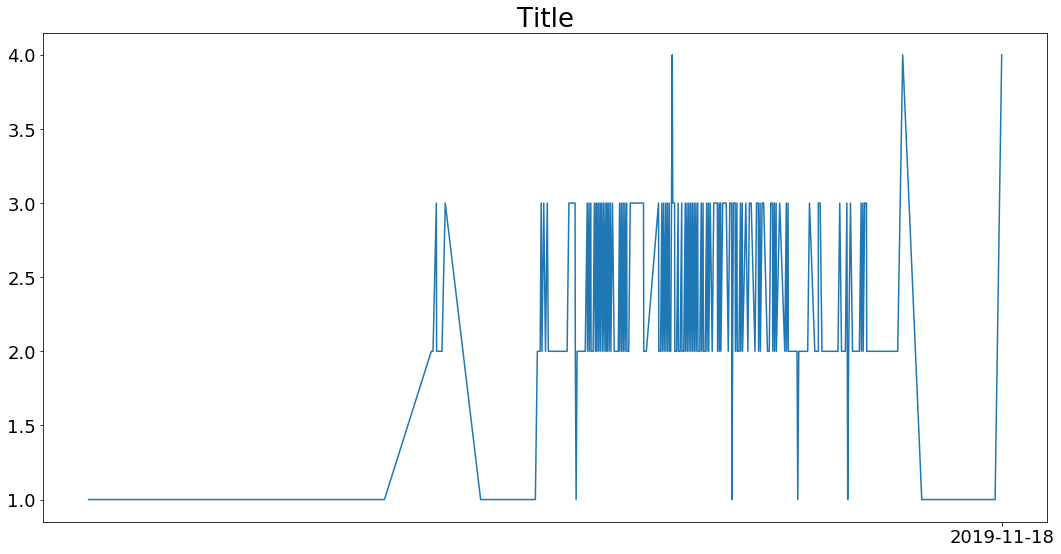

In [24]:
plot_series(grand_st,
            ['result'],
            steps=1000)